In [52]:
# Autograd & Numpy
import autograd
import autograd.numpy as np

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt

# Jupyter & IPython
from IPython.display import display

In [55]:
from numpy import meshgrid
from matplotlib.pyplot import quiver

In [56]:
alpha = 1.5
beta = 0.05
gamma = 0.48 
delta = 0.05

##### Réponse 1:
$\alpha$ est le taux de reproduction des proies, il ne dépend pas du nombre de prédateurs

$\beta$ est le taux de mortalité des proies, il dépend du nombre de prédateurs 

$\gamma$ est le taux de mortalité des prédateurs, il ne dépend pas du nombre de proies

$\delta$ est le taux de reproduction des prédateurs, il dépend du nombre de proies mangées 

Soit $f : \begin{pmatrix}
   x_1  \\
   x_2 
\end{pmatrix} \in \mathbb{R}^2 \mapsto \begin{pmatrix}
   x_1(\alpha-\beta x_2) \\
   -x_2(\gamma-\delta x_1) 
\end{pmatrix} \in \mathbb{R}^2$

On a bien $f(0,0) = (0,0)$ et $f(y) = 0 \Rightarrow \begin{pmatrix}
   y_1(\alpha-\beta y_2) \\
   -y_2(\gamma-\delta y_1) 
\end{pmatrix} = \begin{pmatrix}
   0 \\
   0
\end{pmatrix} \Rightarrow y =(\frac{\gamma}{\delta},\frac{\alpha}{\beta})=\bar{x} \in \mathbb{R}_{>0}^2$ ou $y = (0,0)$

$\bar{x}$ et (0,0) sont ainsi les deux points d'équilibre du système.

Par ailleurs f est continûment différentiable avec $J_{f}(0,0) = \begin{pmatrix}
   \alpha & 0 \\
   0 & -\gamma
\end{pmatrix}$ donc $\alpha$ est une valeur propre strictement positive de cette matrice : le point (0,0) est ainsi instable.

Enfin, $J_{f}(\bar{x}) = \begin{pmatrix}
   0 & -\frac{\beta \gamma}{\delta} \\
   \frac{\delta \alpha}{\beta} & 0
\end{pmatrix}$  et le polynôme caractéristique de cette matrice est: $x^2 + \alpha \gamma$ or $(\alpha,\gamma) \in \mathbb{R}_{>0}^2 \Rightarrow$ les racines sont complexes à partie réelle nulle, on ne peut donc pas conclure sur la stabilité de $\bar{x}$.

##### Réponse 2:


In [57]:
def f(x1, x2):
    return np.array([x1*(alpha-beta*x2),-x2*(gamma-delta*x1)])

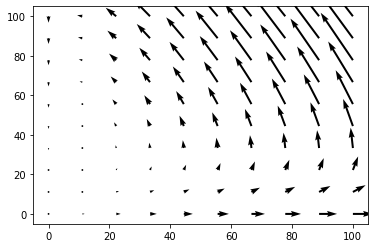

In [58]:
X, Y = np.meshgrid(np.linspace(0,100,10),np.linspace(0,100,10))
Z = f(X, Y)
plt.quiver(X, Y, Z[0], Z[1])

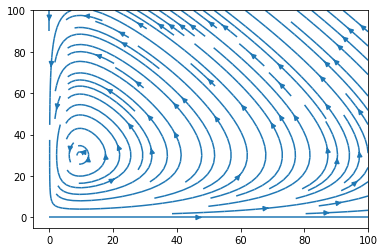

In [59]:
plt.streamplot(X, Y, Z[0], Z[1])

Sur le portrait de phase, on observe des trajectoires concentriques de centre le point d'équilibre $\bar{x}$. Les solutions vont osciller autour de ce point.

##### Réponse 3:
On considère une solution maximale continue initialisée à $t_0 \in \mathbb{R}$ par $(x_{10},x_{20}) \in \mathbb{R}^{+*} \times \mathbb{R}^{+*}$ notée $(x_{1},x_{2}) $.
On suppose que celle-ci ne reste pas dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ et comme $x_{1}$ et $x_{2}$ sont continues, (d'après le théorème des valeurs intermédiaires) il existe $w \in \mathbb{R}$ et $t_{1} \in \mathbb{R}$ tq $x_{1}(t_{1})=w$ et $x_{2}(t_{1})=0$ ou $x_{1}(t_{1})=0$ et $x_{2}(t_{1})=w$. Le problème étant symétrique on se restreint à l'étude du premier cas. 

On considère la solution $X=(wexp(\alpha(t-t_{1})),0)$. Celle-ci vérifie bien les équations de Lokta-Volterra et $X(t_{1})=(w,0)$. 

D'après le théorème de Cauchy-Lipschitz comme X et $(x_{1},x_{2})$ sont toutes les deux des solutions maximales du même problème de Cauchy alors $X=(x_{1},x_{2})$ et donc $x_{2}=0$ $\forall t \in \mathbb{R}$ ce qui est absurde car $x_{20} \in \mathbb{R}^{+*}$. Ainsi toute solution initialisée dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ reste dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$. 

##### Réponse 4:
On pose $X: t \in \mathbb{D}_{x} \mapsto (x_1(t),x_2(t)) \in \mathbb{R}_{>0}^2$ qui est bien définie car on initialise la solution dans $\mathbb{R}_{>0}^2$ donc $\forall t \in \mathbb{D}_{x}, X(t) \in \mathbb{R}_{>0}^2$. ($\mathbb{D}_{x}$  est le domaine de définition de x)

H est continûment différentiable, on peut donc calculer sa dérivée le long des solutions initialisées dans $\mathbb{R}_{>0}^2$: $\forall t \in \mathbb{D}_{x}$ $ \frac{d}{dt}(H \circ X) = (x_1'(t),x_2'(t)).(\delta-\frac{\gamma}{x_1(t)},\beta-\frac{\alpha}{x_2(t)})$ ce qui vaut 0 après développement avec les équations de Lokta-Volterra.

On en déduit que H est constante le long des solutions initialisées dans $\mathbb{R}_{>0}^2$

Supposons ensuite $x_1$ non bornée, alors comme $x_1$ reste dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ sur son domaine de définition, on a $\lim\limits_{t \rightarrow +\infty} x_1(t) = +\infty$. Que $x_2$ soit bornée ou non, on trouve alors que H diverge vers $+\infty$ en considérant la solution maximale du problème, ce qui est absurde car H est constante le long des solutions initialisées dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$. Par conséquent, $x_1$ est bornée sur son ensemble de définition et on montre qu'il en est de même pour $x_2$ via un raisonnement similaire.

Ainsi, toute solution maximale initialisée dans $\mathbb{R}^{+*} \times \mathbb{R}^{+*}$ est bornée, et n'explose donc pas en temps fini. D'après le théorème de domaine d'existence maximal, on conclut : celle-ci est alors définie sur $\mathbb{R}$ entier.


##### Réponse 5:

In [60]:
def courbes_niveau(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
### repris du premier projet numérique ###

In [61]:
def H(x1, x2) :
    return( delta*x1 - gamma* np.log(x1)+beta*x2 - alpha* np.log (x2))

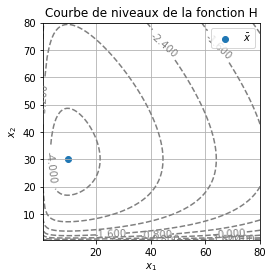

In [62]:
courbes_niveau(
    H, 
    x=np.linspace(0.5, 80, 100), 
    y=np.linspace(0.5, 80, 100),
    levels=10
)
x= (gamma/delta, alpha/beta)

plt.scatter(x[0],x[1],label=r'$\bar{x}$')
plt.title("Courbe de niveaux de la fonction H")
plt.legend()


On remarque alors que le point $\bar{x}$ se situe au centre des courbes de niveau, c'est donc un extrémum de la fonction H. De plus les lignes de niveaux sont décroissantes, ainsi le point $\bar{x}$ est un minimum pour H.   
Or H caractérise un potentiel lié au système étudié ainsi, graphiquement, le point $\bar{x}$ semble stable.

On pourrait prouver ce résultat à l'aide de la fonction de Lyapunov: $V(x)=H(x)-H(\bar{x})$.


##### Réponse 6:

In [63]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    X = [x0]
    T = []
    n = int((tf-t0)/dt)
    for j in range(0,n):
        x = X[j]
        t = t0 + j*dt
        y = x + dt*f(t,x)
        X.append(y)
        T.append(t)
    T.append(t0+n*dt)
    return  T, X

On choisit le système différentiel suivant: $\frac{dx}{dt}= x \in \mathbb{R}$ et $x(0)=1$ de solution exacte $x=\exp$.



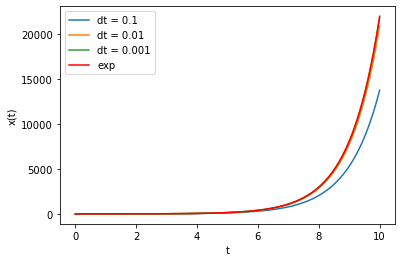

In [64]:
def f(t,x):
    return x

liste_dt = [0.1, 0.01, 0.001]
erreur = []

for dt in liste_dt :
    t, x = solve_euler_explicit(f, 1, dt, 0, 10)
    plt.plot(t, x, label = f"dt = {dt}")
    erreur.append(max(abs(np.exp(t)-x)))

tb = np.linspace(0, 10, 1000)
plt.plot(tb, np.exp(tb), 'r', label = 'exp')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend();

Il y a bien convergence du schéma vers exp.

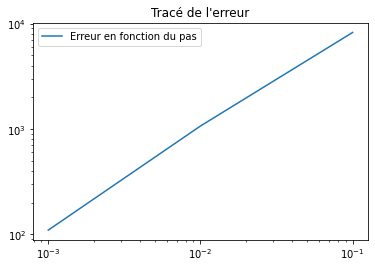

In [65]:
plt.loglog(liste_dt,erreur,label = 'Erreur en fonction du pas')
plt.title("Tracé de l'erreur")
plt.legend()

La méthode est consistante d'orde 1 puisque l'erreur en fonction du pas est majorable par une fonction linéaire. Donc la méthode est d'ordre de convergence 1 d'après la condition suffisante de convergence. 

##### Réponse 7:


In [66]:
def L_V(t, x):
    return np.array([x[0]*(alpha- beta*x[1]), -x[1]*(gamma - delta*x[0])])

t, x = solve_euler_explicit(L_V, np.array([60, 20]), 0.01, 0, 100)
### on initialise avec 60 proies et 20 prédateurs ###

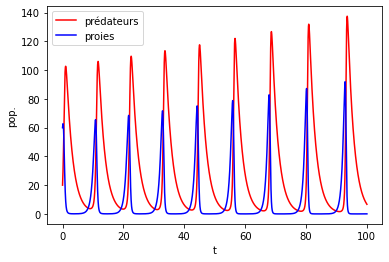

In [67]:
proies = np.array([X[0] for X in x])
prédateurs = np.array([X[1] for X in x])
plt.plot(t, prédateurs, 'r', label = 'prédateurs')
plt.plot(t, proies, 'b', label = 'proies')
plt.xlabel('t')
plt.ylabel("pop.")
plt.legend();

On remarque que les populations évoluent de manière cyclique et que leurs maximums locaux augmentent sans cesse: il n'y a pas convergence vers le point $\bar{x}$=(9,6 ; 30) défini précédemment. En outre, un tel résultat n'est pas en accord avec la réalité car les populations ne peuvent croître indéfiniment, notamment en raiosn de l'espace disponible, nécessairement limité. Le schéma d'Euler explicite ne fournit pas la réponse attendue, il est donc nécessaire d'utiliser un schéma plus fin.

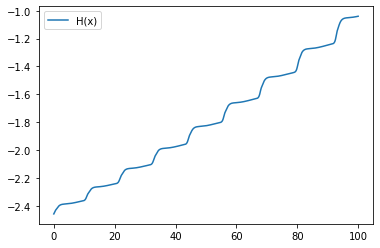

In [68]:
plt.plot(t, H(proies, prédateurs), label = 'H(x)')
plt.legend();

On remarque que la fonction H, théoriquement constante, croît indéfiniment. De la même façon que précedemment, on en déduit que le schéma d'Euler explicite ne fournit pas ici le résultat attendu: il n'y a pas convergence de la solution.

##### Réponse 8:


In [69]:
def f(t,x):
    return x

def point_fixe(F, x, itermax, eps = 1e-6):
    compteur = 0
    p = F(x)
    x0 = x
    ecart = 1
    while compteur <= itermax and ecart > eps :
        compteur += 1
        y0 = x
        y = F(y0)
        ecart = np.linalg.norm(y - y0) / np.linalg.norm(p)
    return y
        
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    X = [x0]
    T = np.arange(t0, tf , dt)
    for t in T[:-1] :
        def F(y):
            return X[-1] + dt * f(t, y)
        x = point_fixe(F, F(X[-1]), itermax)
        X.append(x)
    return T, X 

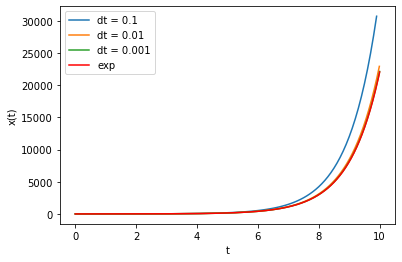

In [70]:
for dt in liste_dt :
    T, X = solve_euler_implicit(f, 1, dt, 0, 10)
    plt.plot(T, X, label = f"dt = {dt}")

T = np.linspace(0, 10, 1000)
plt.plot(T, np.exp(T), 'r', label = 'exp')
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend();

A nouveau, le schéma fournit la réponse attendue : quelle que soit la valeur de dt choisie, il y a convergence vers la fonction exp.

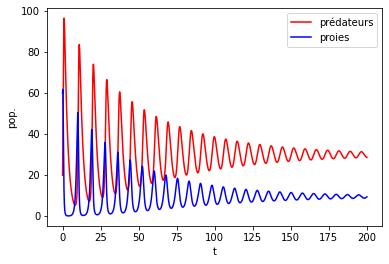

In [71]:
t, x = solve_euler_implicit(L_V, np.array([60, 20]), 0.05, 0, 200)
proies = np.array([X[0] for X in x])
prédateurs = np.array([X[1] for X in x])
plt.plot(t, prédateurs, 'r', label = 'prédateurs')
plt.plot(t, proies, 'b', label = 'proies')
plt.xlabel('t')
plt.ylabel("pop.")
plt.legend();
### Prend quelques secondes ...###

On remarque cette fois que les résultats sont en accord avec la théorie : il y a convergence des nombres de proies et de prédateurs vers le point $\bar{x}$ défini précédemment, celle-ci étant davantage visible dès lors que l'on étudie le système sur un temps long. Contrairement au schéma d'Euler explicite, le schéma implicite produit donc un résultat convergent, en accord avec la théorie.

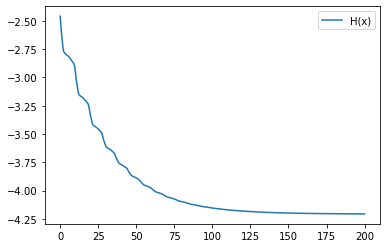

In [72]:
plt.plot(t, H(proies, prédateurs), label = 'H(x)')
plt.legend();

##### Réponse 9:


Montrons que les deux systèmes ont les mêmes solutions.
On considère $x$ une solution du système de Lotka-Volterra avec $x(0)=x_0 \in \mathbb{R}^{+*} \times \mathbb{R}^{+*}$.
D'après la question 4, H est alors constante pour cette solution et donc $\forall t \in \mathbb{R}$ $H(x(t))=H(x_0)$. Et donc x est bien solution du second système défini dans cette question. Or comme ce second système est de la forme $\dot{x} = g(x)$ avec g continûment différentiable car $H$ et $u$ le sont, cette solution est unique d'après le théorème de Cauchy-Lipschitz. 

Enfin, si on considère $x$ une solution du second système, et $x'$ une solution du système de Lotka-Volterra  avec $x'(0)=x(0)$ d'après ce qui précède, x' est aussi solution du second sytème et par unicité (l'existence et l'unicité étant assurées par le théorème de Cauchy Lipschitz), $x'=x$ et donc x est aussi solution du système de Lotka-Volterra. 

Ainsi, les deux systèmes ont les mêmes solutions $\forall u: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ de classe $C^1$.

##### Réponse 10:
$\forall H_0 \in \mathbb{R}$: 
$\frac{d(H-H_0)}{dt} = (\delta -\frac{\gamma}{x_1}, \beta - \frac{\alpha}{x_2})*\left(\begin{array}xx_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0) \\-x_2(\gamma-\delta x_1) - u_2(x_1,x_2)(H(x_1,x_2)-H_0)\end{array}\right)$ $ = (H-H_0)(\frac{\gamma u_1}{x_1} - \gamma u_1 - \beta u_2 + \frac{\alpha u_2}{x_2})$. 

On a: $\left \| \nabla H(x(t)) \right \|^2 = (\gamma - \frac{\gamma}{x_1})^2 + (\beta - \frac{\alpha}{x_2})^2 = \gamma ^2 - 2\frac{\gamma \delta}{x_1} + \frac{\gamma ^2}{x_1^2} + \beta ^2 - 2\frac{\alpha \beta}{x_2} + \frac{\alpha ^2}{x_2^2}$.

En posant: 
- $u_1 = k(-\delta + \frac{\gamma}{x_1})$
- $u_2 = k(-\beta + \frac{\alpha}{x_2})$

Soit $u(x(t))= k\nabla H(x(t))$, on a bien $\frac{d}{dt}(H(x(t)) - H_0) = -k\left \| \nabla H(x(t)) \right \|^2 (H(x(t)) - H_0)$ $\Rightarrow e^{k\int^{t}\left \| \nabla H(x(s)) \right \|^2 ds}(\frac{d}{dt}(H(x(t)) - H_0) + k\left \| \nabla H(x(t)) \right \|^2 (H(x(t)) - H_0)) = 0$ $\Rightarrow \frac{d}{dt}(e^{k\int^{t}\left \| \nabla H(x(s)) \right \|^2 ds}(H(x(t)) - H_0)) = 0$. 

En intégrant on obtient: $\left | H(x(t)) - H_0 \right | = \left | a \right | e^{-k\int^{t}\left \| \nabla H(x(s)) \right \|^2 ds}$

Or x reste a une distance strictement positive de $\bar{x}$ $\Rightarrow \exists \lambda \in \mathbb{R}_{>0}$ tq $\left \| \nabla H(x(s)) \right \|^2  \geq \lambda$.

On a donc:  $\left | H(x(t)) - H_0 \right | \leq \left | a \right | e^{-k \lambda t}$ $\Rightarrow$ $H(x(t))$ converge exponentiellement vers $H_0$.

##### Réponse 11:

On exprime $H(x_{j+1})-H(x_0)$ avec $x_{j+1} -x_{j} = dt$.

$H(x_{j+1})-H(x_0) = H(x_{j}) + \frac{dH(x(t))}{dt}dt -H(x_0) = (H(x_{j})-H(x_0))(1 - k\left \| \nabla H(x_{j}) \right \|^2dt)$

Ainsi, k ne peut être choisi arbitrairement grand car l'écart entre  $H(x_{j+1})-H(x_0)$ et $H(x_{j})-H(x_0)$ croit avec k.

Avec $k=2$ et $dt=0.05$ on a $kdt=0.1$ ce qui reste suffisament petit.

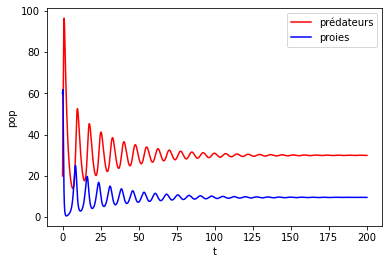

In [73]:
k = 2
x0 = np.array([60,20])
H0 = H(x0[0],x0[1])

def L_V2(t,x):
    return np.array([x[0]*(alpha- beta*x[1]) - k*(-delta + gamma/x[0])*(H(x[0], x[1]) - H0), -x[1]*(gamma - delta*x[0]) - k*(-beta + alpha/x[1])*(H(x[0], x[1]) - H0)])


t, x = solve_euler_implicit(L_V2, x0, 0.05, 0, 200)

proies = np.array([X[0] for X in x])
prédateurs = np.array([X[1] for X in x])
plt.plot(t, prédateurs, 'r', label = 'prédateurs')
plt.plot(t, proies, 'b', label = 'proies')
plt.xlabel('t')
plt.ylabel("pop")
plt.legend();
### cela prend quelques secondes ...###

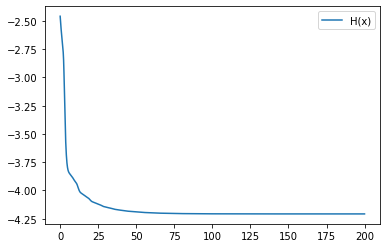

In [74]:
plt.plot(t, H(proies, prédateurs), label = 'H(x)')
plt.legend();

Ce nouveau schéma converge plus rapidement que le précedent ce qui était recherché. 